## *Personal YouTube Watch History Report*
#### *Data is Available from Oct 2018 to Feb 2022*

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

#### Preview the text data containing watch dates

In [5]:
file = Path.cwd() / 'watch_history.txt'

with open(file, 'r') as text:
    textfile = text.read()
print(textfile) 

Feb 2023, 16:31:55 EAT
Feb 2023, 17:48:22 EAT
Feb 2023, 17:48:14 EAT
Feb 2023, 17:47:15 EAT
Feb 2023, 17:46:45 EAT
Feb 2023, 17:46:26 EAT
Feb 2023, 17:45:43 EAT
Feb 2023, 17:45:28 EAT
Feb 2023, 17:45:13 EAT
Feb 2023, 17:45:03 EAT
Feb 2023, 17:44:35 EAT
Feb 2023, 17:44:21 EAT
Feb 2023, 17:43:56 EAT
Feb 2023, 17:43:35 EAT
Feb 2023, 17:43:12 EAT
Feb 2023, 17:43:11 EAT
Feb 2023, 17:42:29 EAT
Feb 2023, 17:41:47 EAT
Feb 2023, 17:41:47 EAT
Feb 2023, 17:41:32 EAT
Feb 2023, 17:41:30 EAT
Feb 2023, 17:41:22 EAT
Feb 2023, 17:40:41 EAT
Feb 2023, 17:40:35 EAT
Feb 2023, 17:39:56 EAT
Feb 2023, 17:39:47 EAT
Feb 2023, 17:39:10 EAT
Feb 2023, 17:38:39 EAT
Feb 2023, 17:38:00 EAT
Feb 2023, 17:37:08 EAT
Feb 2023, 17:37:05 EAT
Feb 2023, 17:37:03 EAT
Feb 2023, 17:37:01 EAT
Feb 2023, 17:36:57 EAT
Feb 2023, 17:36:10 EAT
Feb 2023, 17:36:10 EAT
Feb 2023, 17:34:44 EAT
Feb 2023, 17:33:33 EAT
Feb 2023, 17:33:26 EAT
Feb 2023, 17:33:22 EAT
Feb 2023, 17:32:18 EAT
Feb 2023, 17:31:48 EAT
Feb 2023, 17:31:48 EAT
Feb 2023, 1

#### Create a dataframe from the text file

In [79]:
new = pd.read_csv('watch_history.txt', sep=',', names=['datetime'])
new

,datetime
Feb 2023,16:31:55 EAT
Feb 2023,17:48:22 EAT
Feb 2023,17:48:14 EAT
Feb 2023,17:47:15 EAT
Feb 2023,17:46:45 EAT
...,...
Oct 2018,22:39:36 EAT
Oct 2018,22:35:28 EAT
Oct 2018,22:31:04 EAT
Oct 2018,22:27:05 EAT


In [86]:
new['Time'] = new['datetime'].apply(lambda x: str(x)[:9].strip())
new['Date'] = new.index
new.sample(10)

,datetime,Time,Date
Feb 2020,20:27:50 EAT,20:27:50,Feb 2020
Jan 2023,18:54:12 EAT,18:54:12,Jan 2023
Jun 2022,16:08:29 EAT,16:08:29,Jun 2022
Apr 2022,15:26:48 EAT,15:26:48,Apr 2022
Jul 2022,22:30:04 EAT,22:30:04,Jul 2022
Feb 2022,13:06:04 EAT,13:06:04,Feb 2022
Mar 2022,22:53:05 EAT,22:53:05,Mar 2022
Feb 2022,15:18:18 EAT,15:18:18,Feb 2022
May 2022,21:55:51 EAT,21:55:51,May 2022
May 2022,19:59:48 EAT,19:59:48,May 2022


#### Data Processing and cleaning

In [93]:
data_df = new[['Date','Time']]
data_df['Date']  = pd.to_datetime(data_df['Date'])
data_df['Time'] = pd.to_datetime(data_df['Time'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11216 entries, Feb 2023 to Oct 2018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11216 non-null  datetime64[ns]
 1   Time    11216 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 219.1+ KB


In [95]:
data_df['month'] = data_df['Date'].dt.month
data_df['hour'] = data_df['Time'].dt.hour
data_df

,Date,Time,month,hour
Feb 2023,2023-02-01,2023-02-13 16:31:55,2,16
Feb 2023,2023-02-01,2023-02-13 17:48:22,2,17
Feb 2023,2023-02-01,2023-02-13 17:48:14,2,17
Feb 2023,2023-02-01,2023-02-13 17:47:15,2,17
Feb 2023,2023-02-01,2023-02-13 17:46:45,2,17
...,...,...,...,...
Oct 2018,2018-10-01,2023-02-13 22:39:36,10,22
Oct 2018,2018-10-01,2023-02-13 22:35:28,10,22
Oct 2018,2018-10-01,2023-02-13 22:31:04,10,22
Oct 2018,2018-10-01,2023-02-13 22:27:05,10,22


### At what Hour do I use YouTube more?

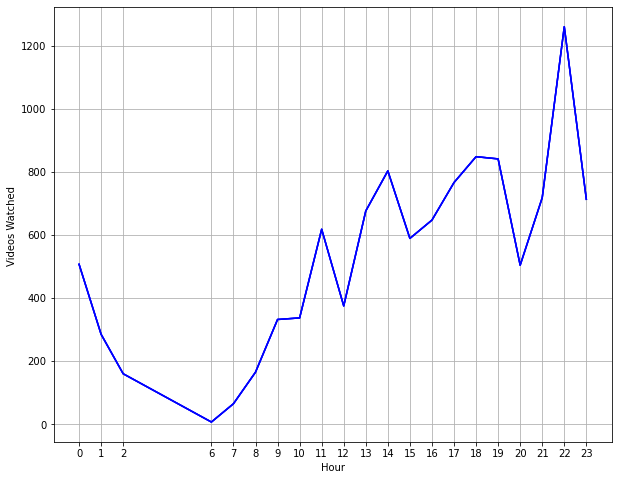

In [99]:
hours = [hour for hour, df in data_df.groupby('hour')]

plt.figure(figsize=(10,8))
plt.plot(hours, data_df.groupby(['hour']).count(), color='b')
plt.xlabel('Hour')
plt.ylabel('Videos Watched ')
plt.xticks(hours)
plt.grid();

### In which month have I used YouTube most?

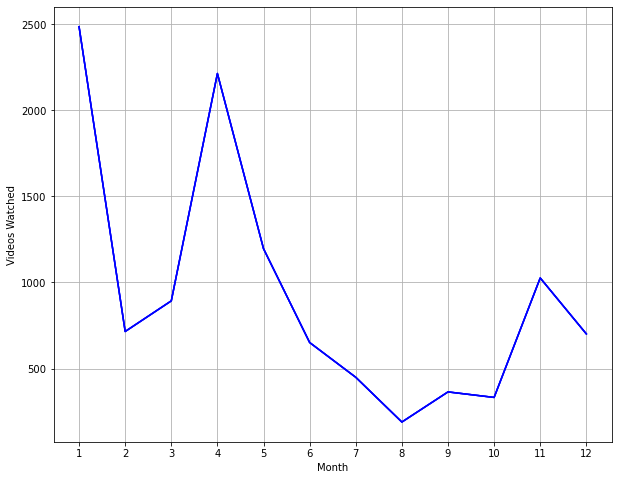

In [98]:
months = [month for month, df in data_df.groupby('month')]

plt.figure(figsize=(10,8))
plt.plot(months, data_df.groupby(['month']).count(), color='b')
plt.xlabel('Month')
plt.ylabel('Videos Watched')
plt.xticks(months)
plt.grid();